#  <h1><center><font size="6">Python Implementation of Decision Tree Classifier.</font></center></h1>

<img src="https://www.sciencemag.org/sites/default/files/styles/article_main_image_-_1280w__no_aspect_/public/cc_iStock-478639870_16x9.jpg?itok=y1oFCoHB" width=500, height = 500 >

# Example
Let's fit a decision tree to some synthetic data. 
We will generate samples from two classes, both normal distributions but with different means.

In [113]:
import numpy as np
# first class
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

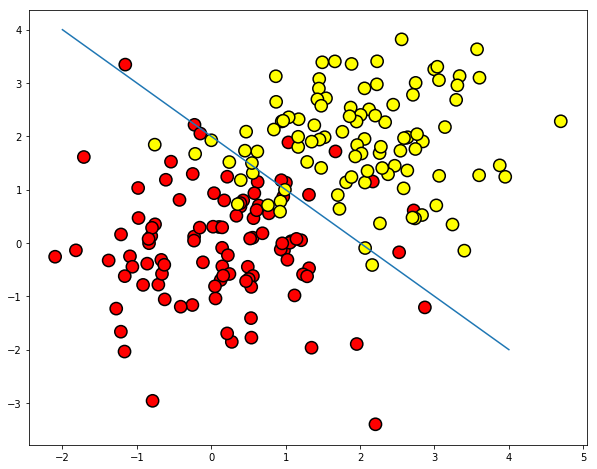

In [114]:
plt.figure(figsize=(10,8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=150, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

#plt.figure(figsize=(10,8))
#plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
#cmap='autumn', edgecolors='black', linewidth=1.5);
#plt.plot(range(-2,5), range(4,-3,-1));

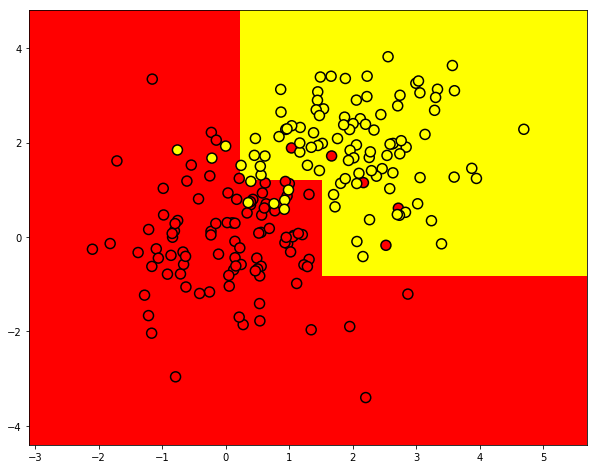

In [115]:
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

plt.figure(figsize=(10,8))
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);

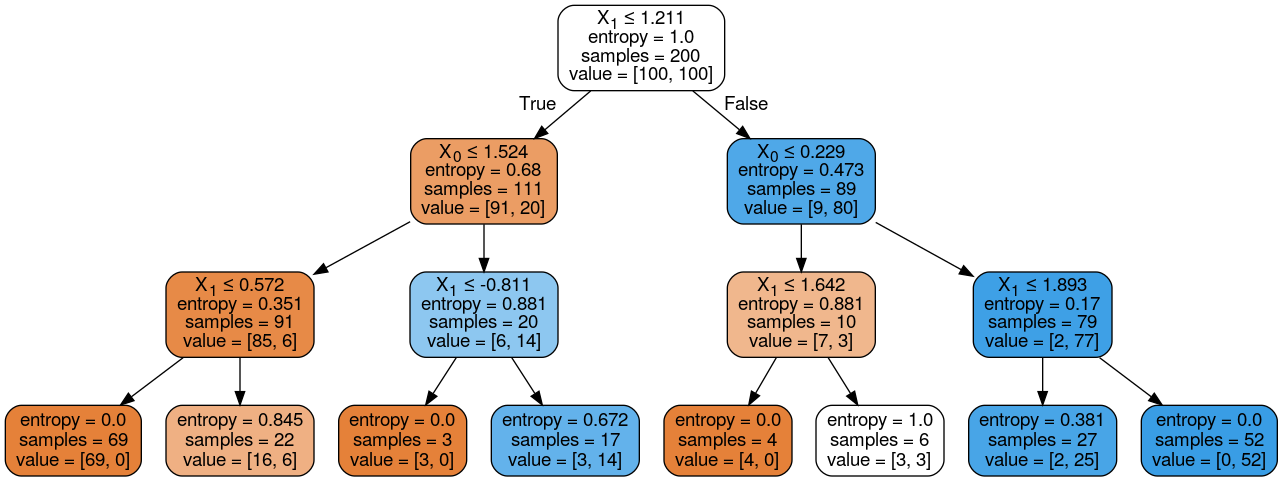

In [116]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<font size="4">
    In this visualization, the more samples of the first class, the darker the orange color of the vertex; the 
       more samples of the second class, the darker the blue. At the beginning, the number of samples from two 
   classes is equal, so the root node of the tree is white.
</font>



# Pros of Using a Decision Tree Classifier
<font size="4">
    
- Generation of clear human-understandable classification rules.


- Decision trees can be easily visualized, i.e. both the model itself (the tree) and prediction for a certain test object (a path in the tree) can "be interpreted".


- Fast training and forecasting.


- Small number of model parameters.


- Supports both numerical and categorical features.</font>

# Cons of Using a Decision Tree Classifier
<font size="4">

- The trees are very sensitive to the noise in input data; the whole model could change if the training set is slightly modified (e.g. remove a feature, add some objects). This impairs the interpretability of the model.


- Separating border built by a decision tree has its limitations – it consists of hyperplanes perpendicular to one of the coordinate axes, which is inferior in quality to some other methods, in practice.


- We need to avoid overfitting by pruning, setting a minimum number of samples in each leaf, or defining a maximum depth for the tree. Note that overfitting is an issue for all machine learning methods.


- Instability. Small changes to the data can significantly change the decision tree. This problem is tackled with decision tree ensembles (discussed next time).


- Difficulties to support missing values in the data. Friedman estimated that it took about 50% of the code to support gaps in data in CART (an improved version of this algorithm is implemented in sklearn).


- The model can only interpolate but not extrapolate (the same is true for random forests and tree boosting). That is, a decision tree makes constant prediction for the objects that lie beyond the bounding box set by the training set in the feature space. In our example with the yellow and blue balls, it would mean that the model gives the same predictions for all balls with positions >19 or <0.</font>

# Main Parameters of the `Decision Tree Classifier`
1.`max_depth` – the maximum depth of the tree;

2.`max_features` - the maximum number of features with which to search for the best partition (this is necessary with a large number of features because it would be "expensive" to search for partitions for all features);

3.`min_samples_leaf` – the minimum number of samples in a leaf. This parameter prevents creating trees where any leaf would have only a few members.

The parameters of the tree need to be set depending on input data, and it is usually done by means of cross-validation, more on this below.
